### Barplot
직사각형 막대를 사용하여 데이터의 값을 표현하는 차트/그래프

In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

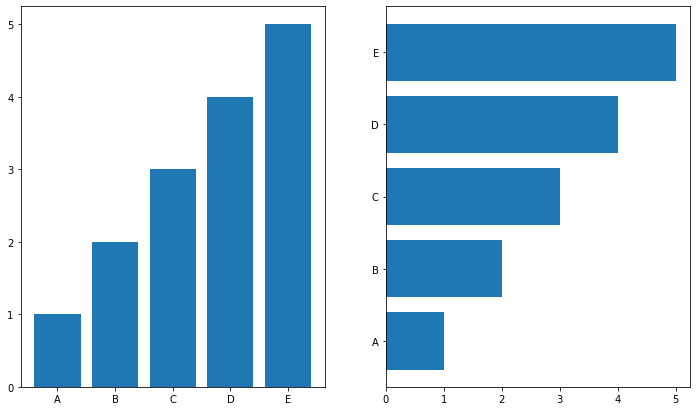

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,7))

x = list('ABCDE')
y = np.array([1,2,3,4,5])

axes[0].bar(x, y)
axes[1].barh(x, y)

plt.show()

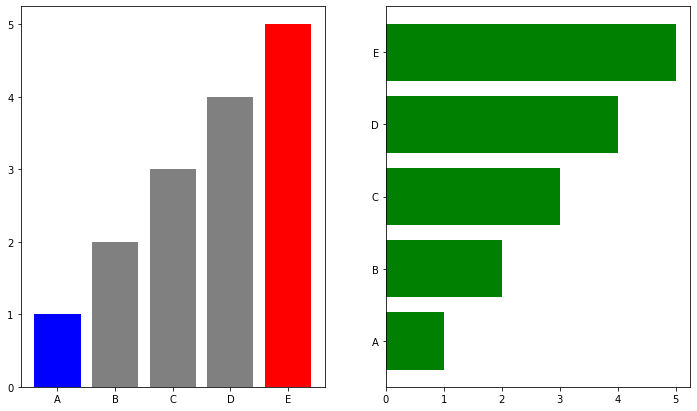

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

clist = ['blue', 'gray', 'gray', 'gray', 'red']
color = 'green'
axes[0].bar(x, y, color=clist)
axes[1].barh(x, y, color=color)

plt.show()

In [35]:
student = pd.read_csv("data/exams.csv")
# student.head()
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
467,female,group C,associate's degree,standard,none,59,63,60
27,male,group E,high school,free/reduced,none,58,65,54
691,female,group E,bachelor's degree,free/reduced,none,63,70,70
331,female,group D,high school,standard,completed,77,90,89
686,male,group D,associate's degree,standard,completed,62,52,59


In [36]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [37]:
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,505,325,241,678,644,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.032000,70.007000,68.708000
std,NaN,NaN,NaN,NaN,NaN,15.039387,14.597741,15.171714
min,NaN,NaN,NaN,NaN,NaN,8.000000,14.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,61.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,67.000000,70.000000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,81.000000,80.000000


In [38]:
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)
print(student['gender'].value_counts())

gender  race/ethnicity
female  group A            39
        group B           110
        group C           160
        group D           114
        group E            82
male    group A            47
        group B            78
        group C           165
        group D           122
        group E            83
Name: race/ethnicity, dtype: int64

female    505
male      495
Name: gender, dtype: int64


### Multi Bar Plot

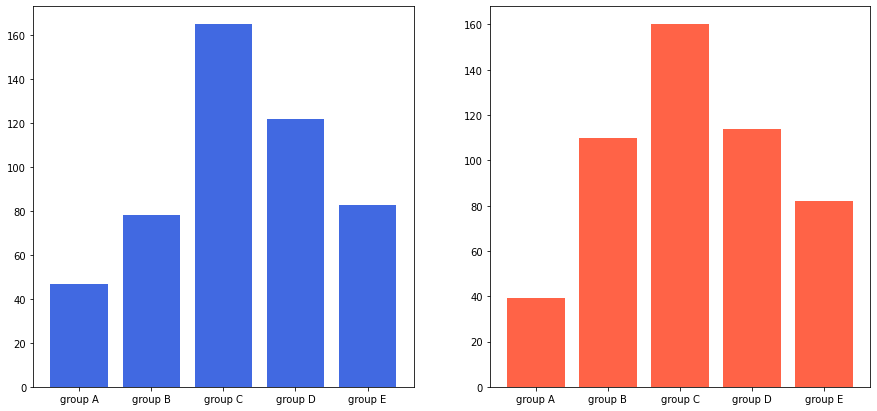

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

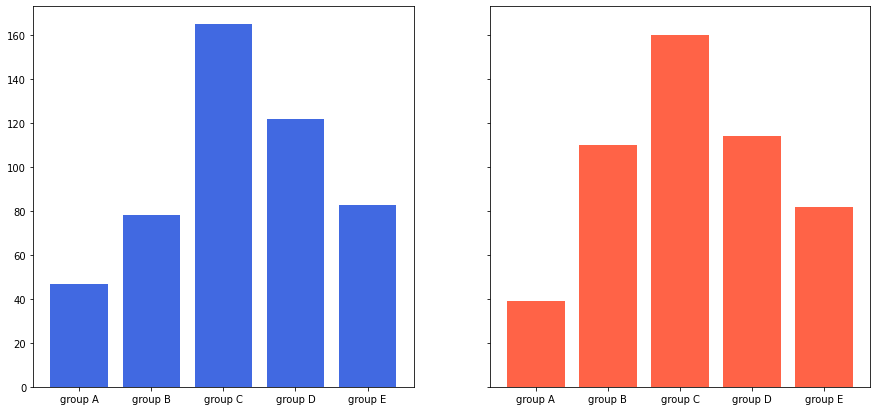

In [40]:
# sharey=True
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

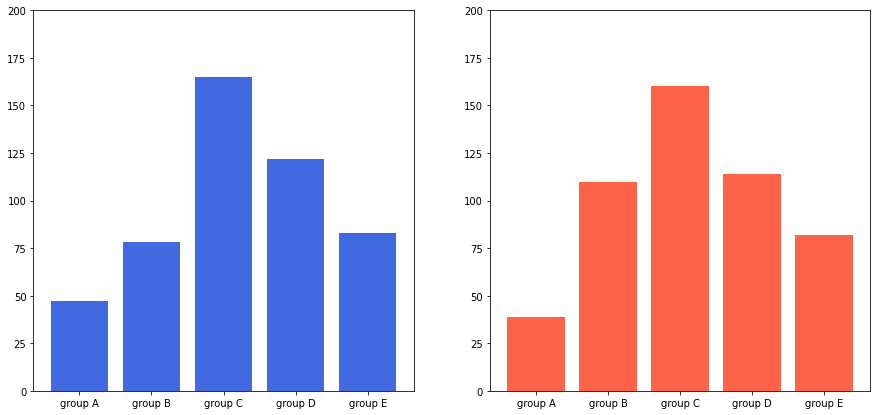

In [41]:
# set_ylim
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 200)

plt.show()

### Stacked Bar Plot

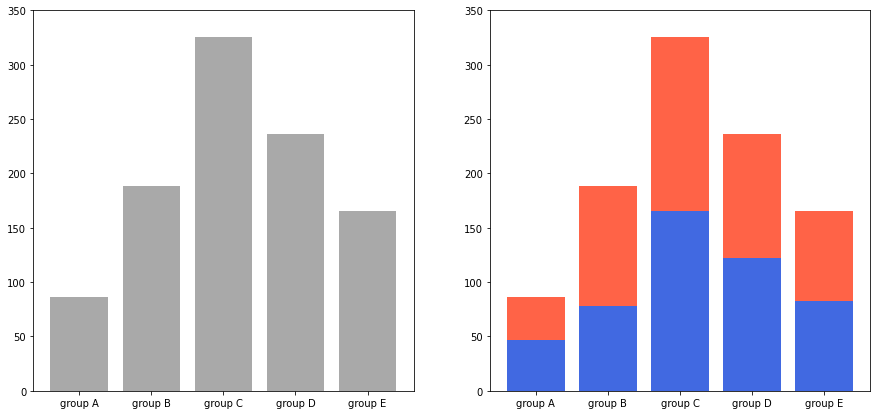

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')
axes[1].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato')

for ax in axes:
     ax.set_ylim(0, 350)

plt.show()

### Percentage Stacked Bar Plot

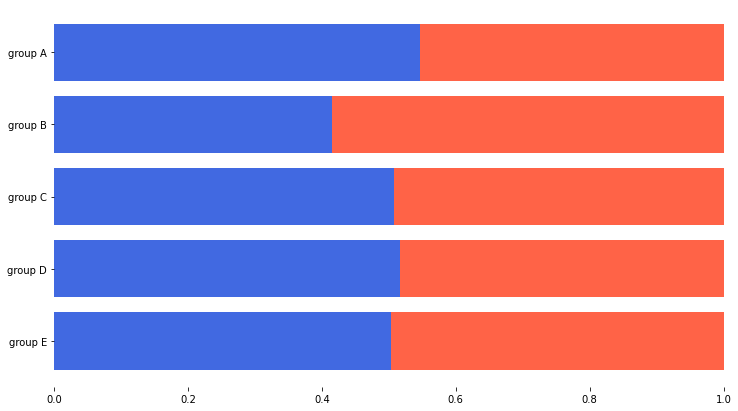

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

group = group.sort_index(ascending=False) # 역순 정렬
total = group['male']+group['female']

ax.barh(group['male'].index, group['male']/total,
        color='royalblue')

ax.barh(group['female'].index, group['female']/total,
        left=group['male']/total,
        color='tomato')

ax.set_xlim(0, 1)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

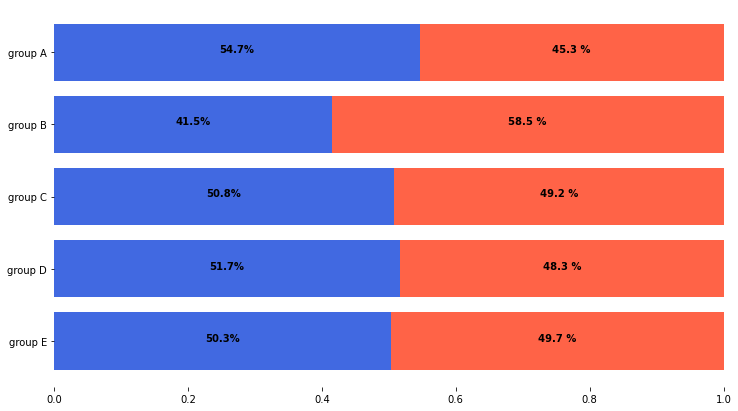

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

group = group.sort_index(ascending=False) # 역순 정렬
total=group['male']+group['female'] # 각 그룹별 합


ax.barh(group['male'].index, group['male']/total, 
        color='royalblue')

ax.barh(group['female'].index, group['female']/total, 
        left=group['male']/total, 
        color='tomato')

ax.set_xlim(0, 1)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

for group_idx in group.index:

    gender = group_idx[0]
    group_cat = group_idx[1]
    val = (group / total)[group_idx]

    if gender == 'male':
        ax.text((val) / 2, group_cat, 
                s=f'{val * 100:.1f}%',
                ha='center',
                fontweight='bold'
                )
    else:
        ax.text(((1-val) + (val/2)), group_cat, 
                s=f'{val * 100:.1f} %',
                ha='center', 
                fontweight='bold'
                )

plt.show()

### Overlapped Bar Plot

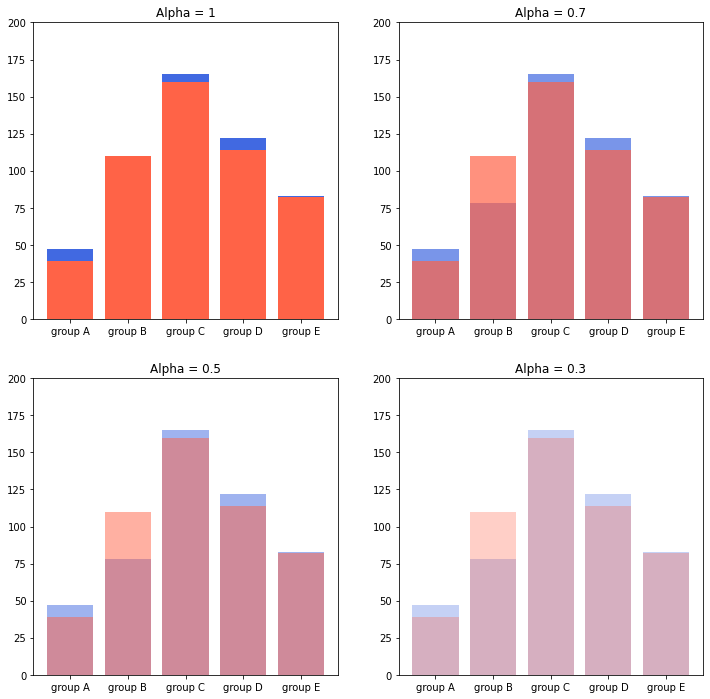

In [17]:
group = group.sort_index() # 다시 정렬

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, 0.7, 0.5, 0.3]):
    axes[idx].bar(group['male'].index, group['male'], 
                  color='royalblue', 
                  alpha=alpha)
    axes[idx].bar(group['female'].index, group['female'],
                  color='tomato',
                  alpha=alpha)
    axes[idx].set_title(f'Alpha = {alpha}')
    
for ax in axes:
    ax.set_ylim(0, 200)
    
    
plt.show()

### Grouped Bar Plot

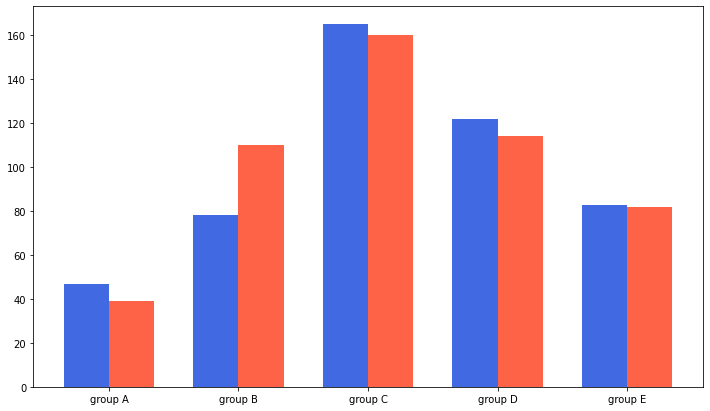

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'], 
       color='royalblue',
       width=width)

ax.bar(idx+width/2, group['female'], 
       color='tomato',
       width=width)

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
    
plt.show()

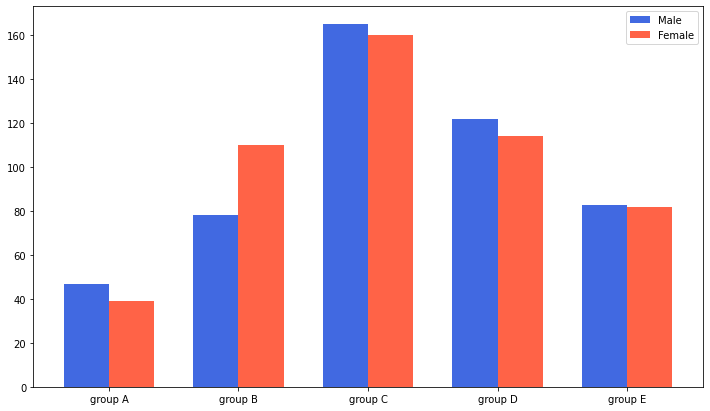

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'], 
       color='royalblue',
       width=width, label='Male')

ax.bar(idx+width/2, group['female'], 
       color='tomato',
       width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()    
    
plt.show()

### Parental Level of Education Grouped Bar Plot

In [20]:
group = student.groupby('parental level of education')['race/ethnicity'].value_counts().sort_index()
group_list = sorted(student['race/ethnicity'].unique())
edu_lv = student['parental level of education'].unique()

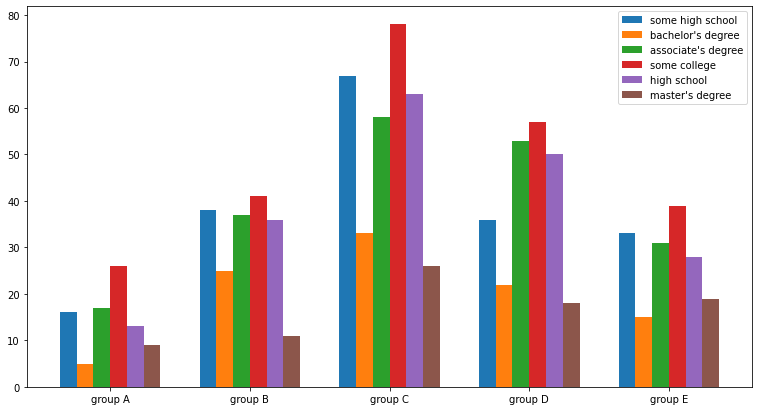

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

x = np.arange(len(group_list))
width=0.12

for idx, g in enumerate(edu_lv):
    ax.bar(x+(-len(edu_lv)+1+2*idx)*width/2, group[g], 
       width=width, label=g)

ax.set_xticks(x)
ax.set_xticklabels(group_list)
ax.legend()    
    
plt.show()

In [22]:
score = student.groupby('gender').mean().T
score

gender,female,male
math score,64.564356,69.549495
reading score,73.506931,66.436364
writing score,72.946535,64.383838


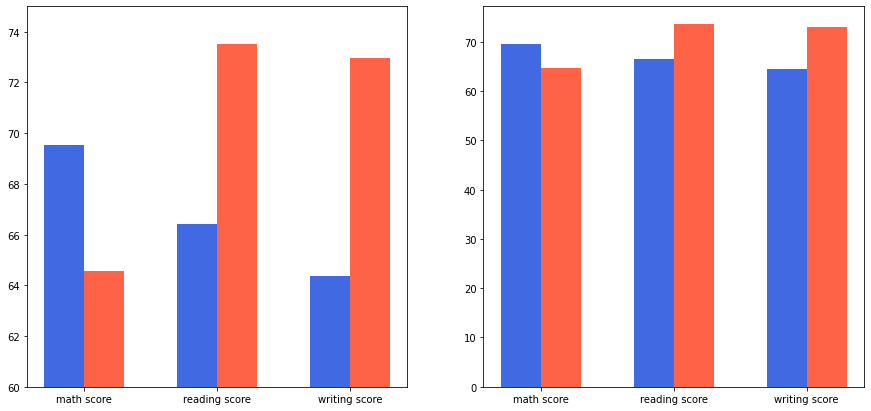

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

idx = np.arange(len(score.index))
width=0.3

for ax in axes:
    ax.bar(idx-width/2, score['male'], 
           color='royalblue',
           width=width)

    ax.bar(idx+width/2, score['female'], 
           color='tomato',
           width=width)

    ax.set_xticks(idx)
    ax.set_xticklabels(score.index)

axes[0].set_ylim(60, 75)
    
plt.show()

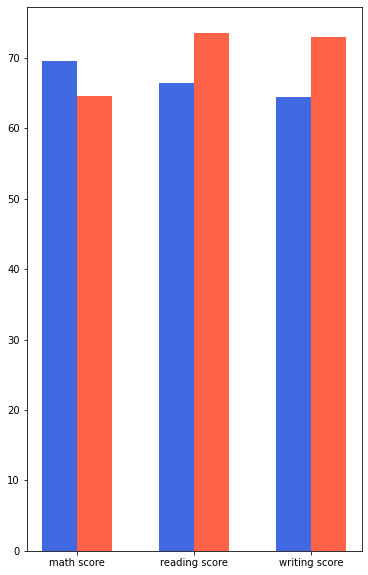

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 10))

idx = np.arange(len(score.index))
width=0.3

ax.bar(idx-width/2, score['male'], 
       color='royalblue',
       width=width)

ax.bar(idx+width/2, score['female'], 
       color='tomato',
       width=width)

ax.set_xticks(idx)
ax.set_xticklabels(score.index)


    
plt.show()

In [25]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some high school,standard,completed,69,63,62
1,female,group D,bachelor's degree,free/reduced,completed,58,73,76
2,male,group C,bachelor's degree,standard,none,56,47,48
3,female,group D,associate's degree,free/reduced,none,69,80,83
4,female,group A,some college,standard,none,70,79,72


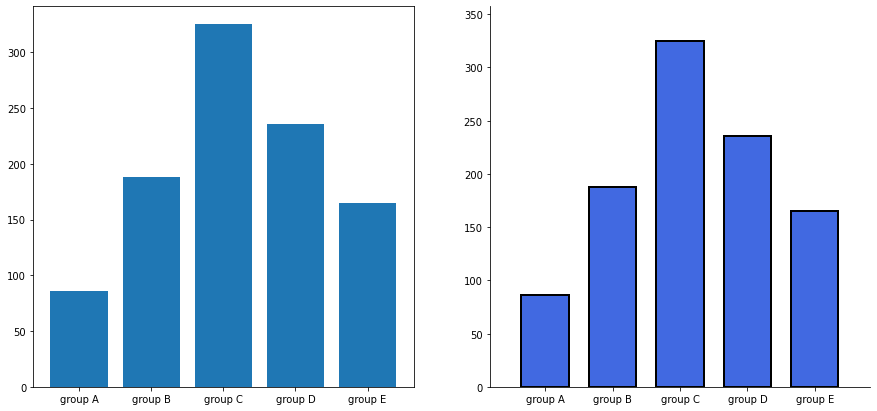

In [26]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig = plt.figure(figsize=(15, 7))

ax_basic = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

ax_basic.bar(group_cnt.index, group_cnt)
ax.bar(group_cnt.index, group_cnt,
       width=0.7,
       edgecolor='black',
       linewidth=2,
       color='royalblue'
      )

ax.margins(0.1, 0.1)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

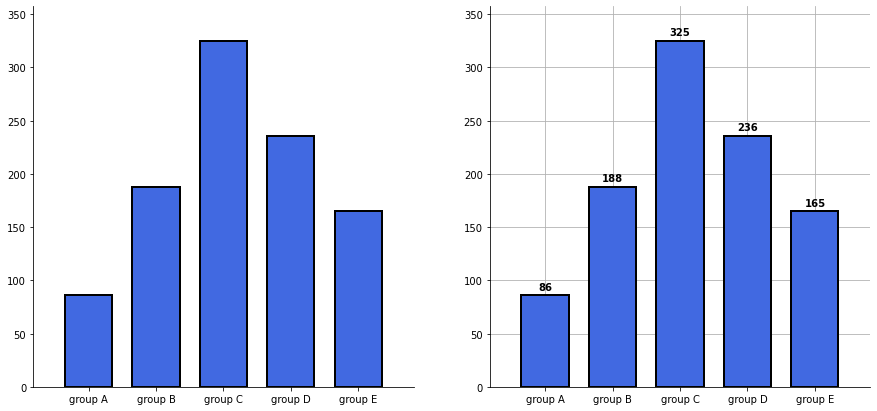

In [27]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

for ax in axes:
    ax.bar(group_cnt.index, group_cnt,
           width=0.7,
           edgecolor='black',
           linewidth=2,
           color='royalblue',
           zorder=10
          )

    ax.margins(0.1, 0.1)

    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

axes[1].grid(zorder=0)

for idx, value in zip(group_cnt.index, group_cnt):
    axes[1].text(idx, value+5, s=value,
                 ha='center', 
                 fontweight='bold'
                )
        
plt.show()

In [28]:
score_var = student.groupby('gender').std().T
score_var

gender,female,male
math score,14.571945,15.105870
reading score,13.813686,14.524288
writing score,13.961367,15.149930


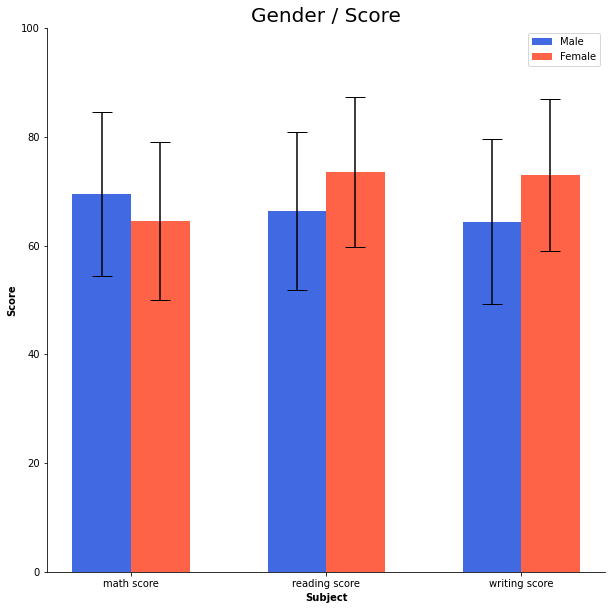

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

idx = np.arange(len(score.index))
width=0.3


ax.bar(idx-width/2, score['male'], 
       color='royalblue',
       width=width,
       label='Male',
       yerr=score_var['male'],
       capsize=10
      )

ax.bar(idx+width/2, score['female'], 
       color='tomato',
       width=width,
       label='Female',
       yerr=score_var['female'],
       capsize=10
      )

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('Subject', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

plt.show()